In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from genetic_selection import GeneticSelectionCV
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('Final_results2.csv',header=0)
df = pd.DataFrame(data, columns=data.columns)
df['target'] = data.target
X = df.drop(['target'], axis=1)
y = df['target'].astype(float)
estimator = DecisionTreeClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=75,
    n_population=200, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=100,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

In [ ]:
Features: Index(['pcm_RMSenergy_sma_de_maxSegLen', 'audSpec_Rfilt_sma[3]_quartile3',
       'audSpec_Rfilt_sma[16]_quartile3', 'audSpec_Rfilt_sma[21]_maxSegLen',
       'audSpec_Rfilt_sma_de[3]_iqr2-3', 'audSpec_Rfilt_sma_de[6]_iqr1-2',
       'audSpec_Rfilt_sma_de[6]_lpc3', 'mfcc_sma_de[1]_leftctime',
       'mfcc_sma_de[4]_segLenStddev', 'F0final_sma_stddev',
       'audSpec_Rfilt_sma[5]_peakMeanAbs',
       'pcm_fftMag_spectralEntropy_sma_linregc2', 'mfcc_sma[7]_qregc2',
       'mfcc_sma[11]_peakRangeAbs'],
      dtype='object')

In [ ]:
from __future__ import print_function
import numpy as np
from sklearn import datasets, linear_model

from genetic_selection import GeneticSelectionCV
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('Final_results2.csv',header=0)

In [ ]:
data

In [28]:
import numpy as np
data = pd.read_csv('Final_results2.csv',header=0)
data1=data.to_numpy()
E = np.random.uniform(0, 0.1, size=(len(data1.data), 20))

X1 = np.hstack((data1.data, E))
y1 = data.target

estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

selector = GeneticSelectionCV(estimator,
                                cv=5,
                                verbose=1,
                                scoring="accuracy",
                                max_features=100,
                                n_population=200,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=100,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                tournament_size=3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
selector = selector.fit(X, y)

print('Features:', X1.columns[selector.support_])

NameError: name 'linear_model' is not defined

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

data = pd.read_csv('Final_results2.csv',header=0)
df = pd.DataFrame(data, columns=data.columns)
df['target'] = data.target

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

In [36]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=100,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.5,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)


In [ ]:
evolved_estimator=evolved_estimator.fit(X_train,y_train)

/Users/shahrasm/myenv/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/shahrasm/myenv/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	100   	0.586667	0.0291792  	0.642424   	0.50303    
1  	126   	0.608788	0.0165617  	0.642424   	0.569697   
2  	117   	0.617273	0.0157896  	0.642424   	0.569697   
3  	117   	0.622303	0.0138966  	0.642424   	0.563636   
4  	124   	0.62697 	0.010888   	0.648485   	0.593939   
5  	121   	0.632909	0.00845254 	0.648485   	0.593939   
6  	113   	0.635333	0.0112425  	0.648485   	0.569697   
7  	107   	0.635576	0.0115837  	0.648485   	0.569697   
8  	127   	0.637212	0.0100328  	0.648485   	0.593939   
9  	122   	0.63903 	0.0107161  	0.660606   	0.587879   


In [ ]:
print('Features:', X.columns[evolved_estimator.support_])

In [20]:
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

0.6382428940568475

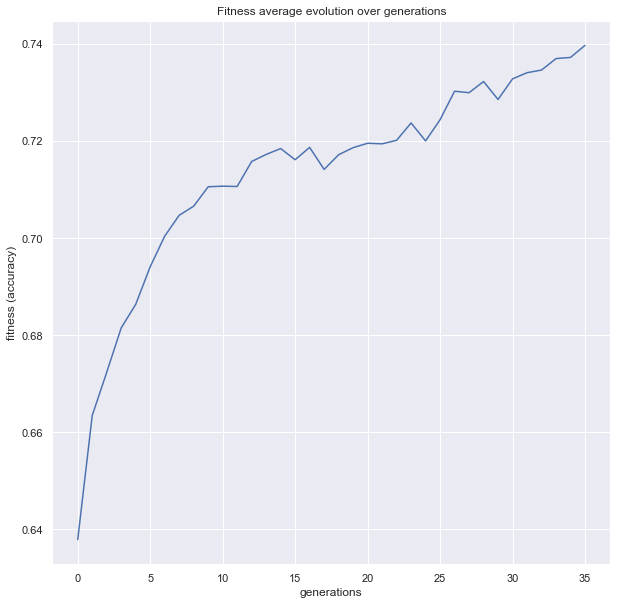

In [21]:
plot_fitness_evolution(evolved_estimator)
plt.show()